In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math
from tensorflow.keras import layers

In [2]:
nsamples = 2000
val_ratio = 0.2
test_ratio = 0.2
tflite_model_name = 'sine_model'
c_model_name = 'sine_model'

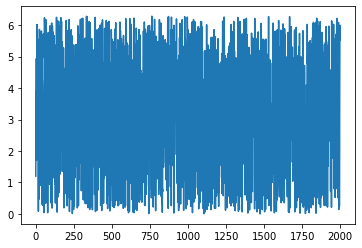

In [3]:
np.random.seed(1234)
x_values = np.random.uniform(low=0, high=(2 * math.pi), size=nsamples)
plt.plot(x_values)

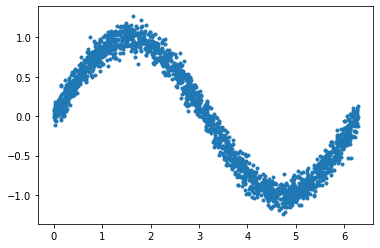

In [4]:
y_values = np.sin(x_values)  + (0.1 * np.random.randn(x_values.shape[0]))
plt.plot(x_values, y_values, '.')

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(x_values, y_values, test_size=test_ratio)

In [7]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1600,), (1600,), (400,), (400,))

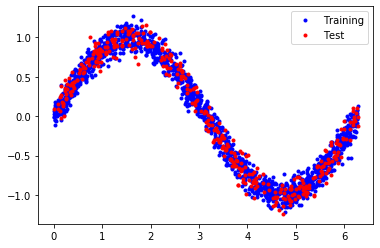

In [8]:
plt.plot(X_train, y_train, 'b.', label = 'Training')
plt.plot(X_test, y_test, 'r.', label = 'Test')
plt.legend()

In [9]:
model = tf.keras.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape = (1,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1))

2023-04-25 13:17:15.322183: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 AVX512F FMA
2023-04-25 13:17:15.324901: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2419200000 Hz
2023-04-25 13:17:15.325133: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x55fa81131a00 executing computations on platform Host. Devices:
2023-04-25 13:17:15.325148: I tensorflow/compiler/xla/service/service.cc:175]   StreamExecutor device (0): Host, Default Version


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(optimizer='rmsprop', loss='mae', metrics=['mae'])

In [12]:
history = model.fit(X_train,
                    y_train,
                    epochs=500,
                    batch_size=100)

Train on 1600 samples
Epoch 1/500
1600/1600 [==============================] - 0s 210us/sample - loss: 0.5778 - mae: 0.5778
Epoch 2/500
1600/1600 [==============================] - 0s 7us/sample - loss: 0.4921 - mae: 0.4921
Epoch 3/500
1600/1600 [==============================] - 0s 7us/sample - loss: 0.4608 - mae: 0.4608
Epoch 4/500
1600/1600 [==============================] - 0s 8us/sample - loss: 0.4349 - mae: 0.4349
Epoch 5/500
1600/1600 [==============================] - 0s 7us/sample - loss: 0.4088 - mae: 0.4088
Epoch 6/500
1600/1600 [==============================] - 0s 7us/sample - loss: 0.3862 - mae: 0.3862
Epoch 7/500
1600/1600 [==============================] - 0s 7us/sample - loss: 0.3670 - mae: 0.3670
Epoch 8/500
1600/1600 [==============================] - 0s 7us/sample - loss: 0.3515 - mae: 0.3515
Epoch 9/500
1600/1600 [==============================] - 0s 8us/sample - loss: 0.3329 - mae: 0.3329
Epoch 10/500
1600/1600 [==============================] - 0s 7us/sample - lo

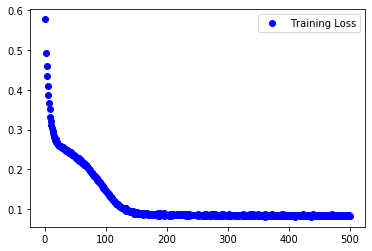

In [13]:
loss = history.history['loss']
# val_loss = history.history['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training Loss')
# plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.legend()
plt.show()

No handles with labels found to put in legend.


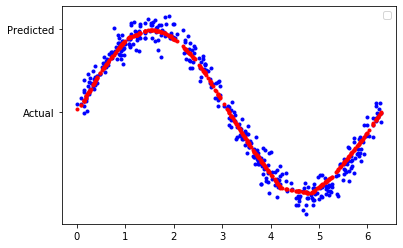

In [14]:
predictions = model.predict(X_test)

plt.plot(X_test, y_test, 'b.', 'Actual')
plt.plot(X_test, predictions, 'r.', 'Predicted')
plt.legend()
plt.show()

In [15]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
tflite_model = converter.convert()

open(tflite_model_name + '.tflite', 'wb').write(tflite_model)

2023-04-25 13:17:23.235387: I tensorflow/core/grappler/devices.cc:60] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0 (Note: TensorFlow was not compiled with CUDA support)
2023-04-25 13:17:23.235477: I tensorflow/core/grappler/clusters/single_machine.cc:356] Starting new session
2023-04-25 13:17:23.236387: I tensorflow/core/grappler/optimizers/meta_optimizer.cc:716] Optimization results for grappler item: graph_to_optimize
2023-04-25 13:17:23.236404: I tensorflow/core/grappler/optimizers/meta_optimizer.cc:718]   function_optimizer: function_optimizer did nothing. time = 0.002ms.
2023-04-25 13:17:23.236409: I tensorflow/core/grappler/optimizers/meta_optimizer.cc:718]   function_optimizer: function_optimizer did nothing. time = 0.001ms.
2023-04-25 13:17:23.249856: I tensorflow/core/grappler/devices.cc:60] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0 (Note: TensorFlow was not compiled with CUDA support)
2023-04-25 13:17:23.249960: I tenso

2680

In [16]:
from tinymlgen import port
open('sine_model.h', 'w').write(port(model, optimize=False, pretty_print=True))


2023-04-25 13:17:24.841847: I tensorflow/core/grappler/devices.cc:60] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0 (Note: TensorFlow was not compiled with CUDA support)
2023-04-25 13:17:24.841953: I tensorflow/core/grappler/clusters/single_machine.cc:356] Starting new session
2023-04-25 13:17:24.842871: I tensorflow/core/grappler/optimizers/meta_optimizer.cc:716] Optimization results for grappler item: graph_to_optimize
2023-04-25 13:17:24.842891: I tensorflow/core/grappler/optimizers/meta_optimizer.cc:718]   function_optimizer: function_optimizer did nothing. time = 0.002ms.
2023-04-25 13:17:24.842894: I tensorflow/core/grappler/optimizers/meta_optimizer.cc:718]   function_optimizer: function_optimizer did nothing. time = 0ms.
2023-04-25 13:17:24.861063: I tensorflow/core/grappler/devices.cc:60] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0 (Note: TensorFlow was not compiled with CUDA support)
2023-04-25 13:17:24.861186: I tensorflo

17025